In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
gpu=tf.config.experimental.list_physical_devices('GPU')
for i in gpu:
    tf.config.experimental.set_memory_growth(i, True)

# 循环神经网络

目前你见过的所有神经网络都有一个主要特点，那就是他们都没有记忆，它们单独处理每个输入，在输入与输入之间没有保存任何状态。对于这样的网络，要想处理数据点的序列或时间序列，你需要向网络展示整个序列，即将序列转换为单个数据点。

循环神经网络处理序列的方式是，遍历所有序列元素，并保存一个状态，其中包含与已查看内容相关的信息。可以理解为在处理信息的同时保存一个关于所处理内容的内部模型，这个模型时根据过去的信息构建的，并随着新信息的进入而不断更新。


# 
现在，让我们尝试在IMDB电影评审分类问题上使用这样的模型。首先，让我们对数据进行预处理：

In [6]:
# 6-22准备IMDB数据
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [7]:
# 6-23 用Embedding层和SimpleRNN层训练模型
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 41s 2ms/sample - loss: 0.6477 - acc: 0.6102 - val_loss: 0.5349 - val_acc: 0.7448
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3967 - acc: 0.8306 - val_loss: 0.3762 - val_acc: 0.8390
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/sample - loss: 0.2969 - acc: 0.8820 - val_loss: 0.3724 - val_acc: 0.8456
Epoch 4/10
20000/20000 [==============================] - 45s 2ms/sample - loss: 0.2193 - acc: 0.9163 - val_loss: 0.4318 - val_acc: 0.8048
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/sample - loss: 0.1499 - acc: 0.9453 - val_loss: 0.4394 - val_acc: 0.8268
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/sample - loss: 0.0954 - acc: 0.9682 - val_loss: 0.5722 - val_acc: 0.7954
Epoch 7/10
20000/20000 [==============================] - 45s 2ms/sample - loss: 0.0544 - acc: 0.9843 - val_loss: 0.5

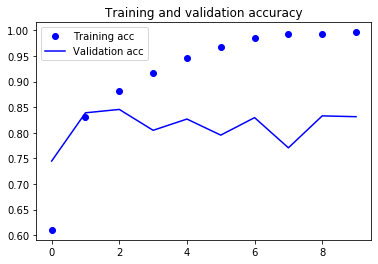

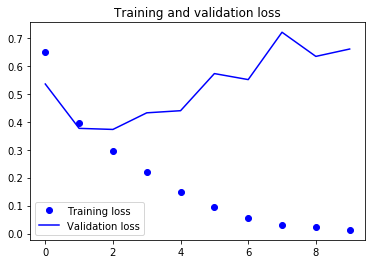

In [9]:
# 6-24绘制结果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# LSTM层和GRU层

LSTM层是SimpleRNN层的一种变体，他增加了一种携带信息跨越多个时间步的方法。假设有一条传送带，其运行方向平行于你所处理的序列，序列中的信息可以在任意位置跳上传送带，然后被传送带送到更晚的时间步，并在需要时原封不动的跳回来。这就是LSTM的原理，他保存信息以便后面使用，从而防止较早期的信号在处理过程中逐渐消失。

# LSTM实例

现在，让我们转到更实际的关注点：我们将使用LSTM层建立一个模型，并在IMDB数据上对其进行训练。这是一个网络，类似于SimpleRNN我们刚刚介绍的。我们只指定LSTM层的输出维数，并将所有其他参数(有很多)留给Keras默认值。

In [10]:
# 6-27使用LSTM层
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 553us/sample - loss: 0.5538 - acc: 0.7358 - val_loss: 0.4004 - val_acc: 0.8406
Epoch 2/10
20000/20000 [==============================] - 6s 322us/sample - loss: 0.3103 - acc: 0.8804 - val_loss: 0.2899 - val_acc: 0.8852
Epoch 3/10
20000/20000 [==============================] - 6s 316us/sample - loss: 0.2475 - acc: 0.9068 - val_loss: 0.2868 - val_acc: 0.8832
Epoch 4/10
20000/20000 [==============================] - 6s 317us/sample - loss: 0.2047 - acc: 0.9237 - val_loss: 0.2842 - val_acc: 0.8934
Epoch 5/10
20000/20000 [==============================] - 6s 312us/sample - loss: 0.1807 - acc: 0.9335 - val_loss: 0.3436 - val_acc: 0.8610
Epoch 6/10
20000/20000 [==============================] - 6s 310us/sample - loss: 0.1653 - acc: 0.9421 - val_loss: 0.3107 - val_acc: 0.8880
Epoch 7/10
20000/20000 [==============================] - 6s 311us/sample - loss: 0.1444 - acc: 0.9498 - val_l

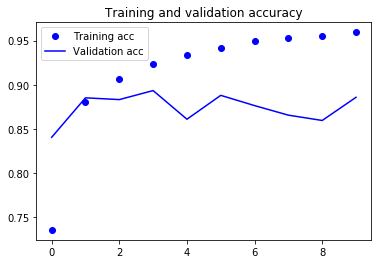

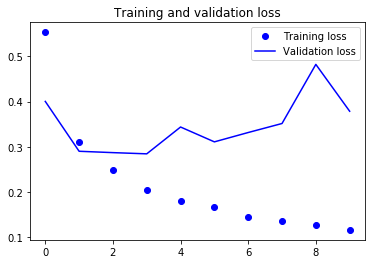

In [11]:
# 绘制结果
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()